In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# TO remove columns which has one single value.
for i in df:
    if df[f"{i}"].nunique()==1:
        print(i,"has single unique value")
    else :
        continue

EmployeeCount has single unique value
Over18 has single unique value
StandardHours has single unique value


In [4]:
#Dropping off columns EmployeeCount, Over18 ,StandardHours 

df.drop(["EmployeeCount", "Over18" ,"StandardHours"], axis=1, inplace=True)

In [5]:
# Dropping column EmployeeNumber as it has no use in learning
df.drop("EmployeeNumber", axis=1, inplace=True)

## 1. Identification of variables and data types

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [7]:
x=0
for i in df.dtypes:
    if i=="object":
        print(df.columns[x])
        x=x+1
    else:
        x=x+1
        continue

Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
OverTime


In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Value counts for each feature data
for i in df.columns:
    print(df[i].value_counts())
    print('*****************')

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
*****************
No     1233
Yes     237
Name: Attrition, dtype: int64
*****************
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
*****************
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64
*****************
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
*****************
2     211
1     208
10     86
9      85
3      84
7      8

### Checking for null values.

In [10]:
df.isnull().sum().sum()

0

In [11]:
# checking for empty spaces
df.isin(['NAN','NA','N/A','-',' ','?',np.nan]).sum().sum()

0

In [12]:
df.duplicated().sum()

0

## 2. Univariate Analysis

In [13]:
# To find all columns with object datatype so that we can remove them before plotting
x=0
for i in df.dtypes:
    if i=="object":
        print(df.columns[x])
        x=x+1
    else:
        x=x+1
        continue

Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
OverTime


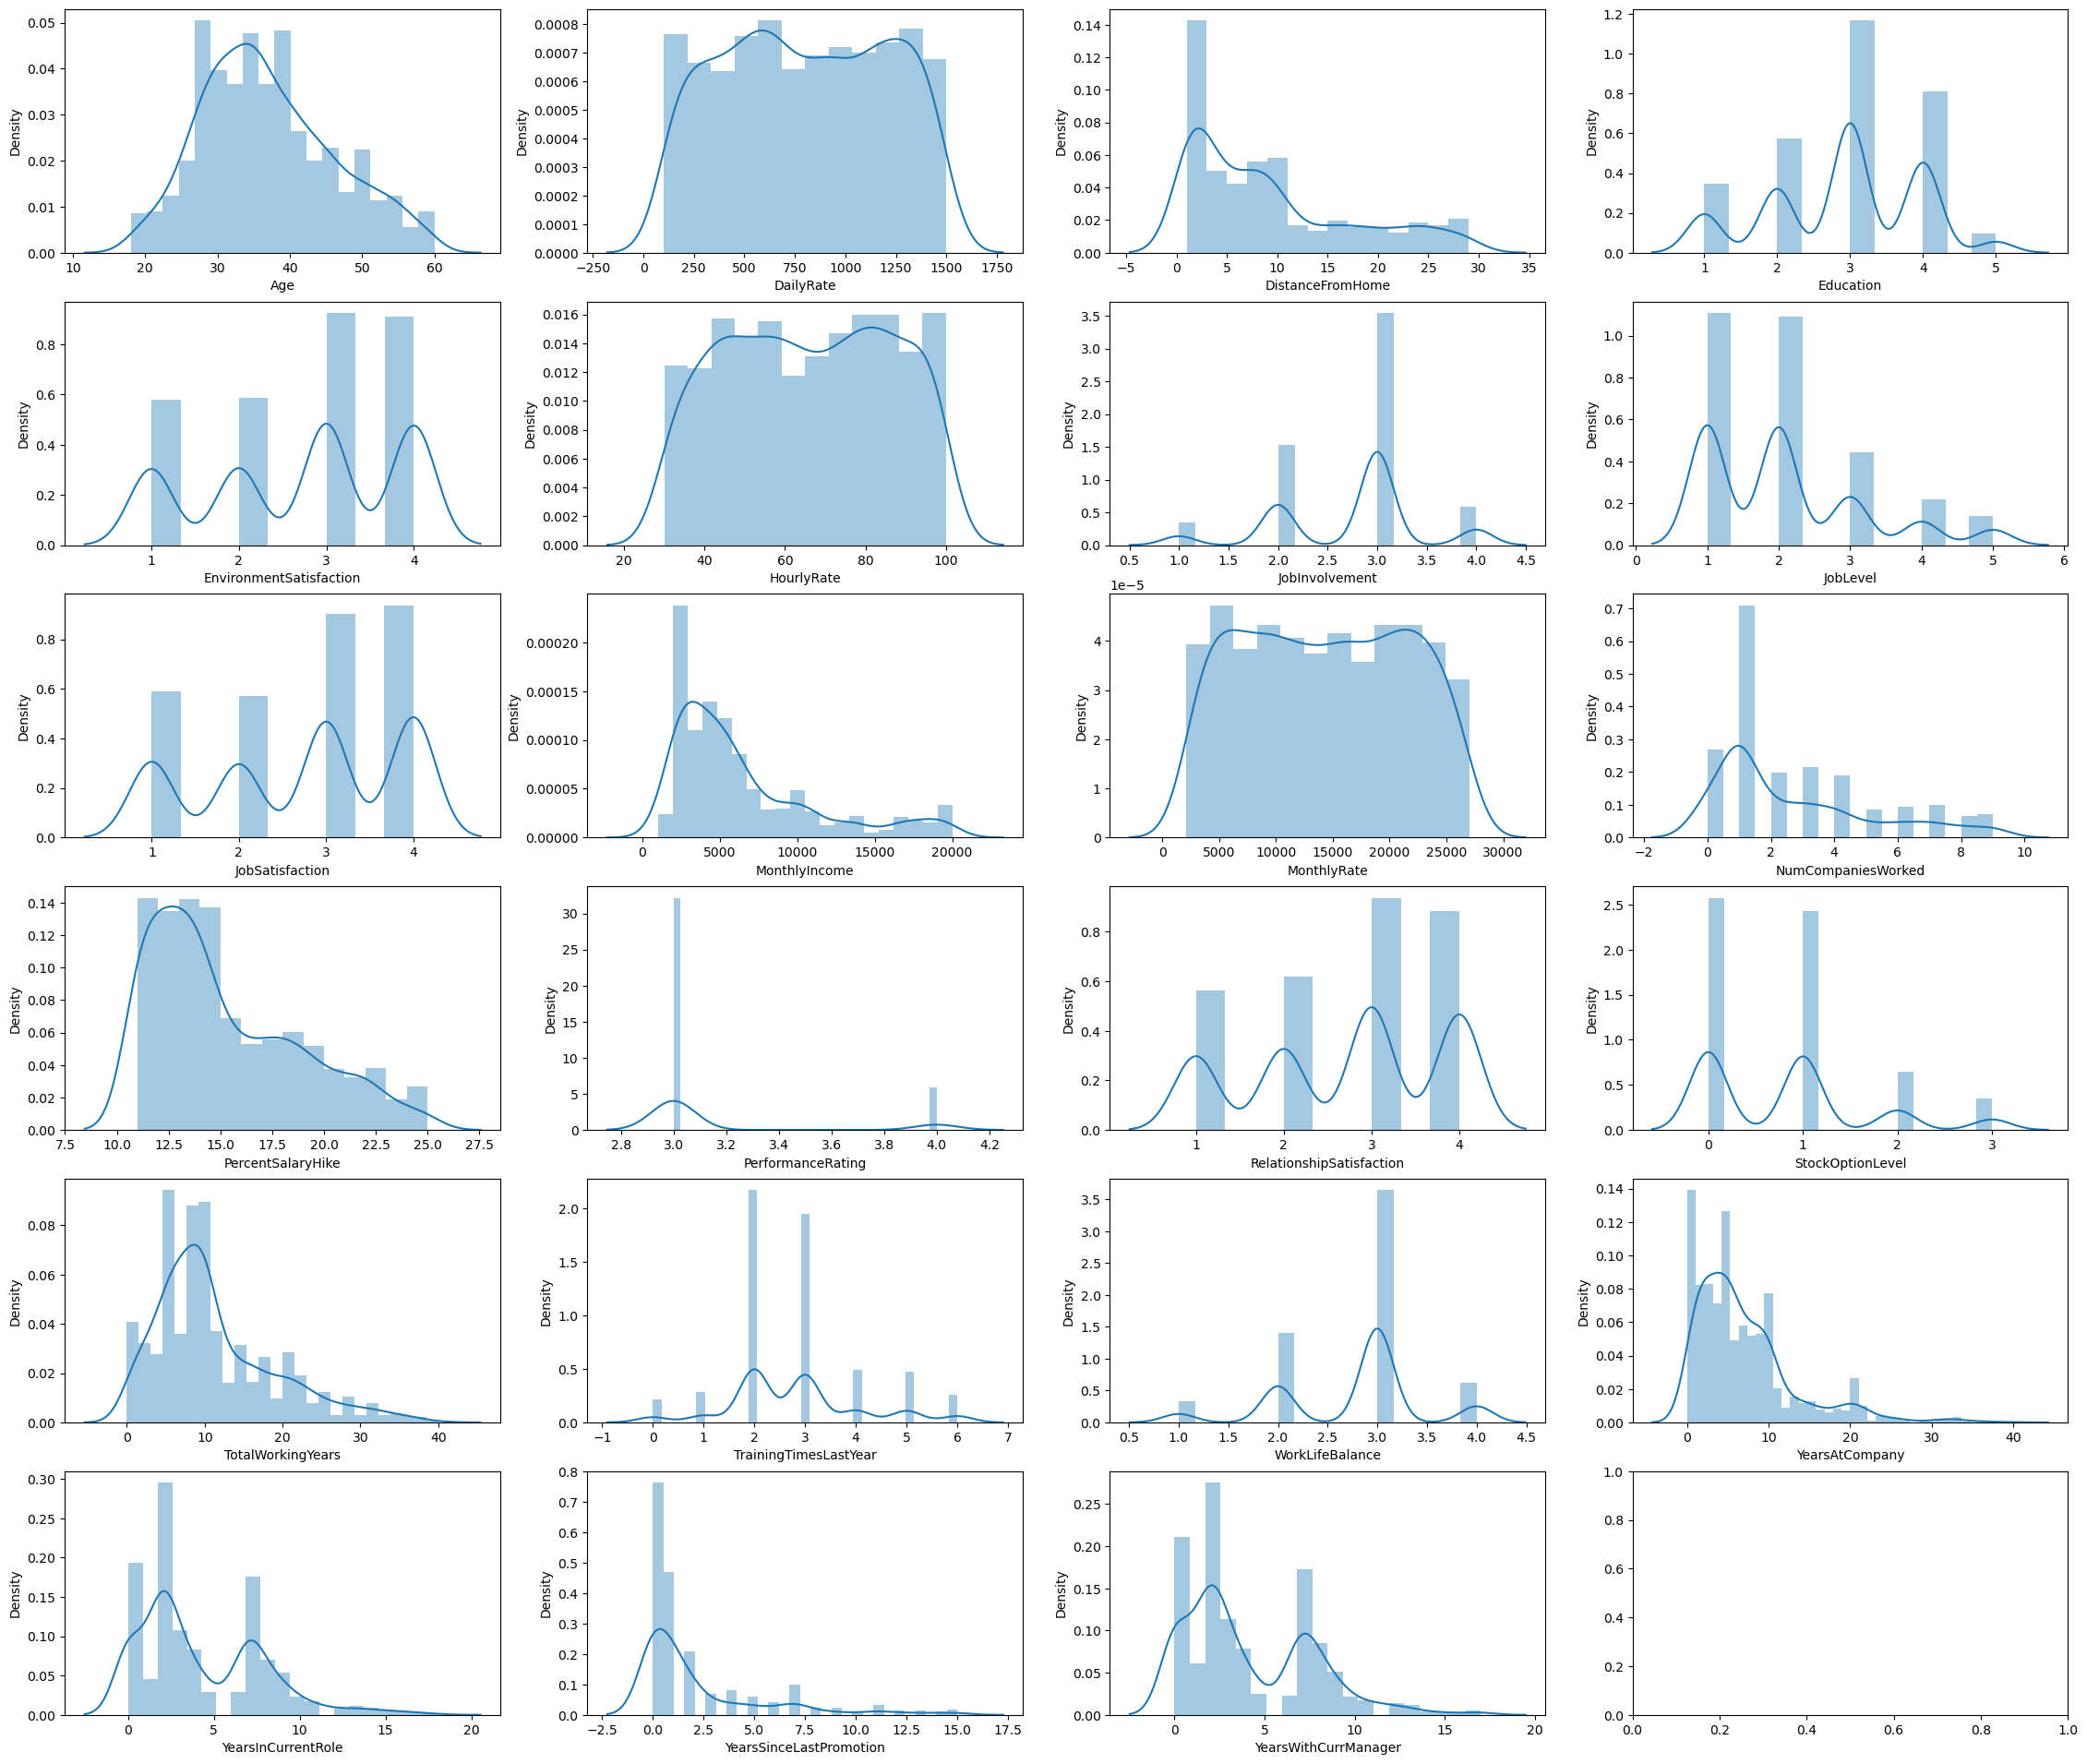

In [14]:
#plotting a histogram of each independent feature for visualization
cols = df.drop(["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"],axis=1).columns
fig,ax = plt.subplots(6,4, figsize=(28, 24))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i])
    i += 1
plt.show()

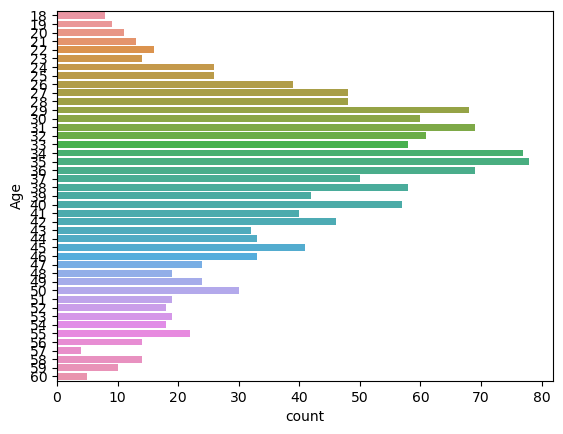

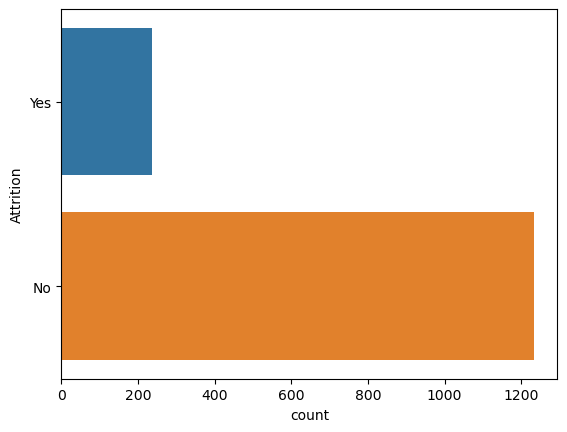

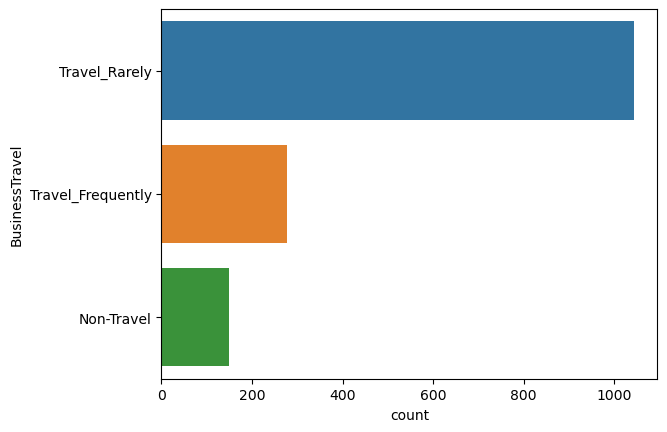

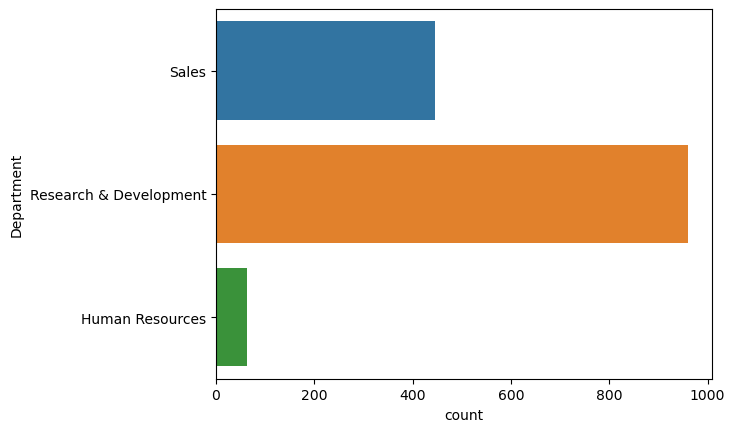

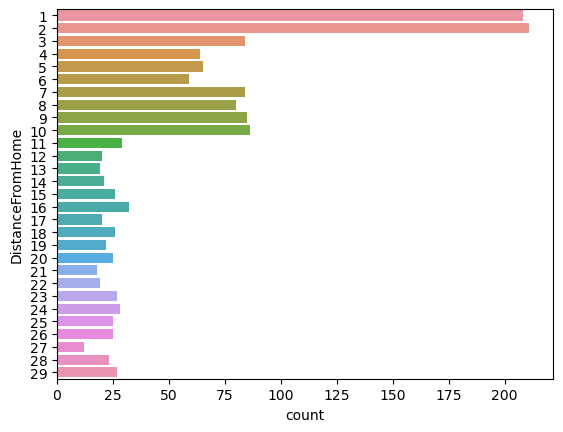

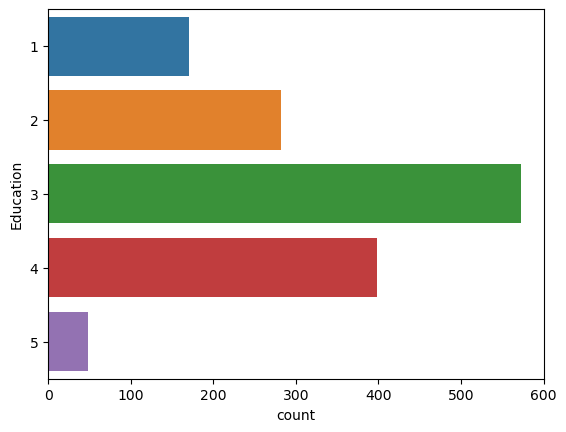

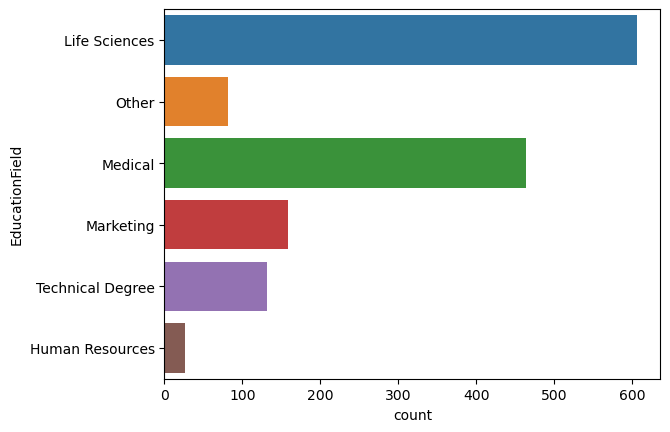

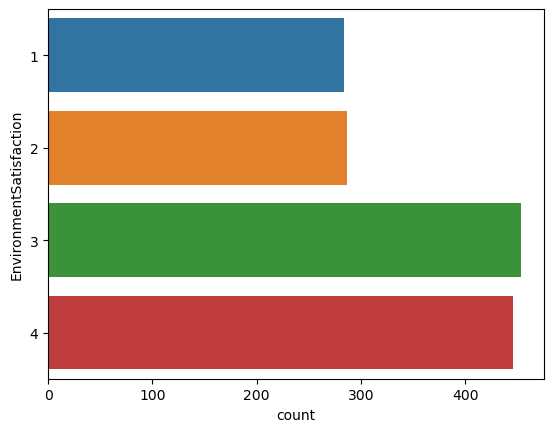

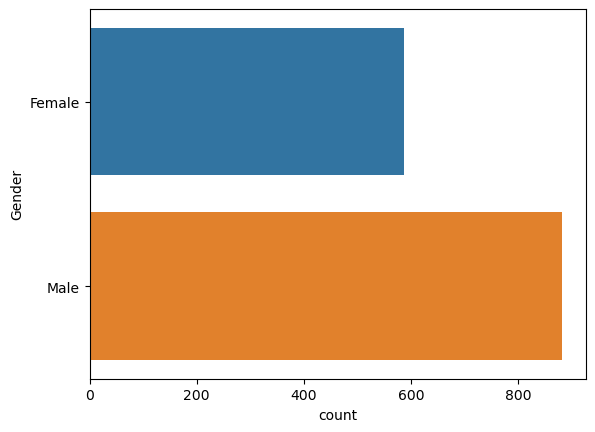

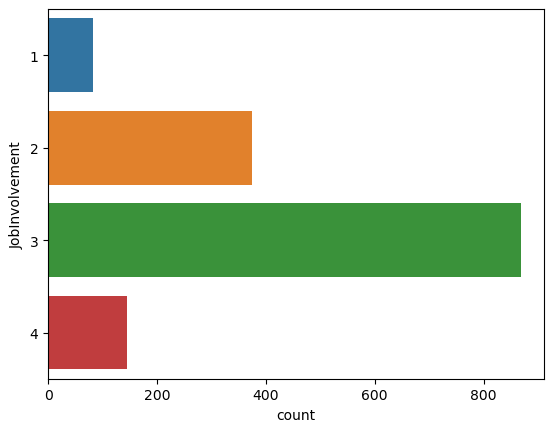

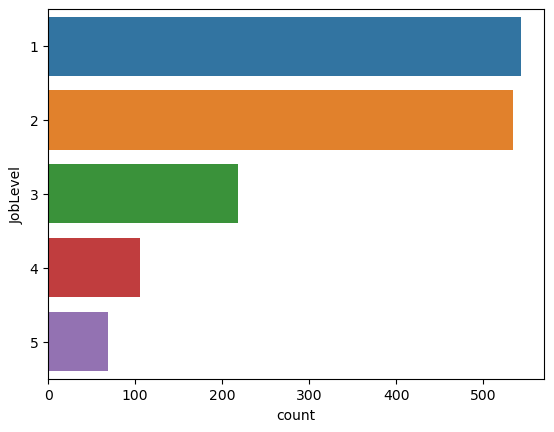

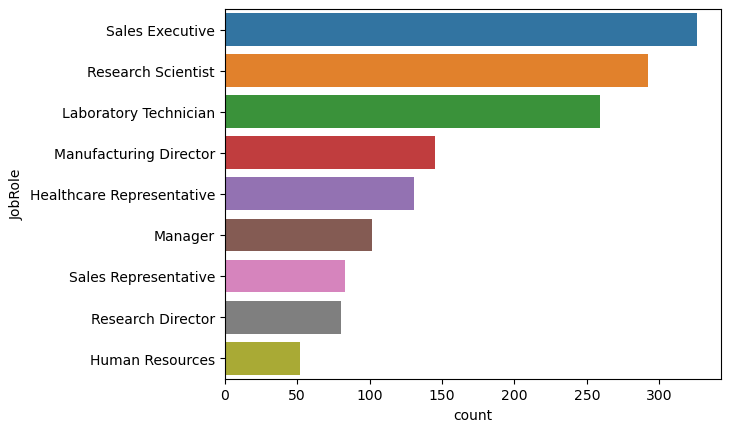

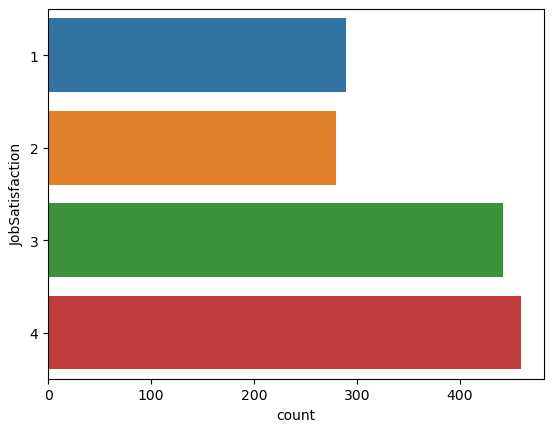

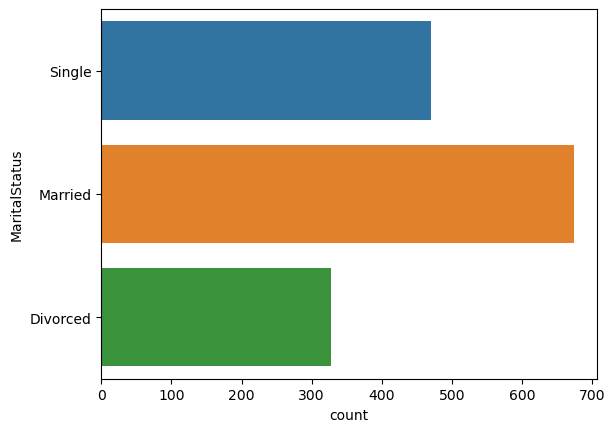

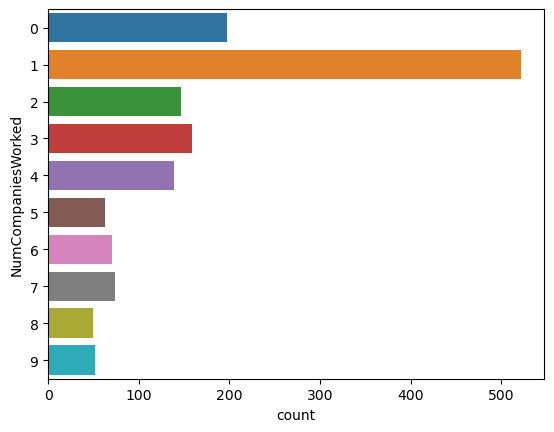

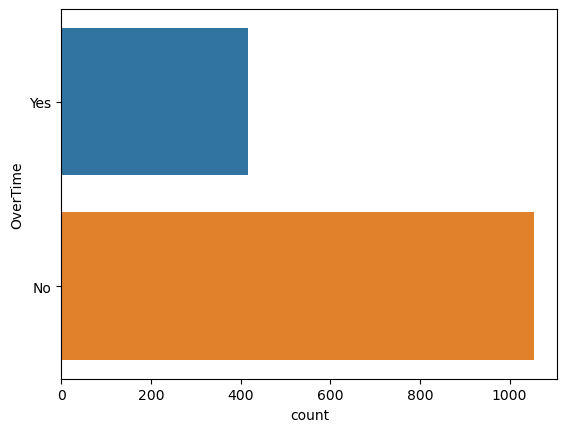

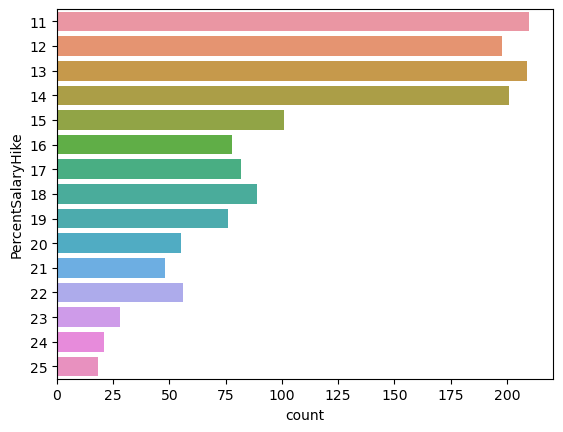

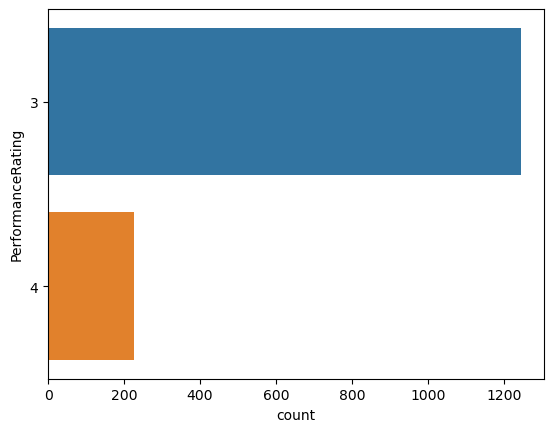

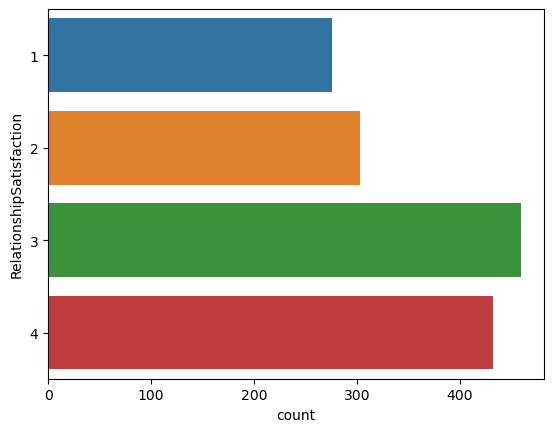

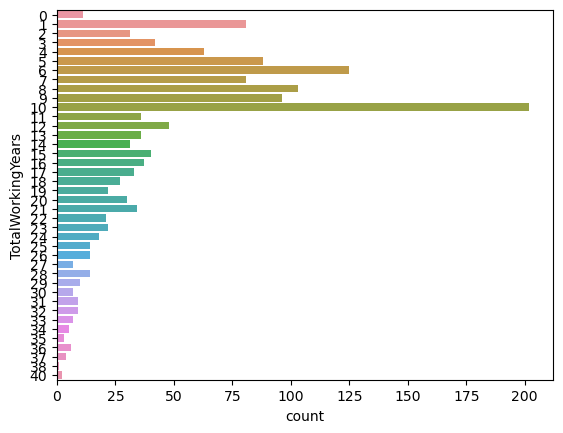

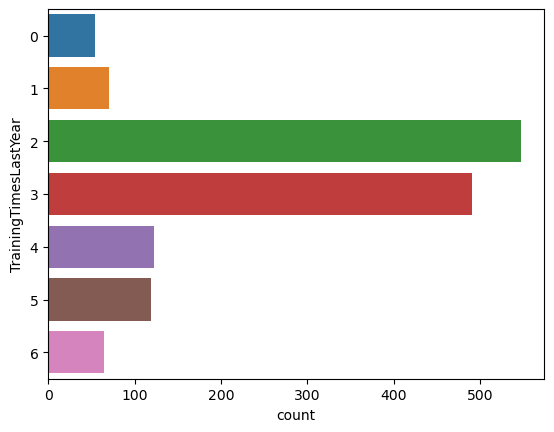

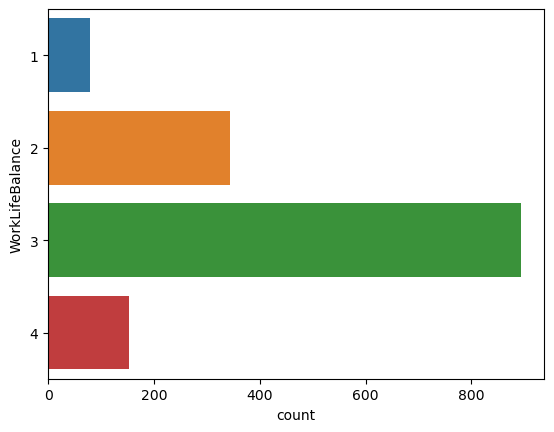

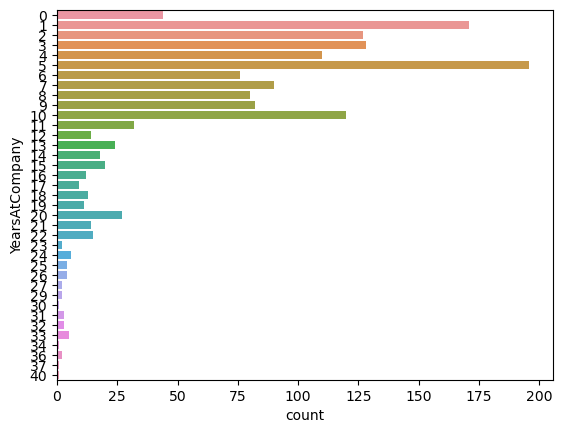

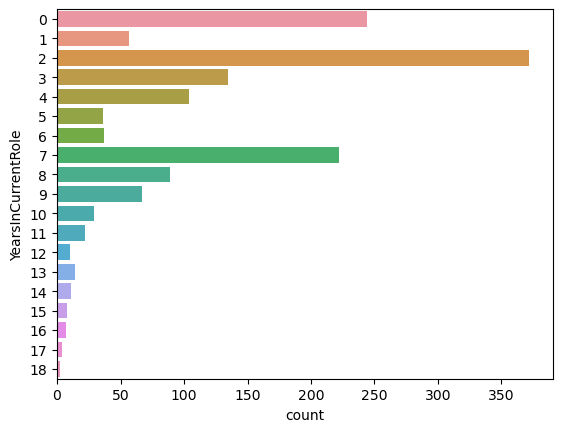

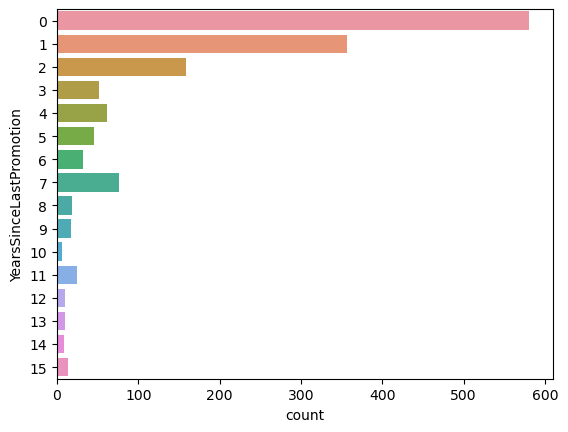

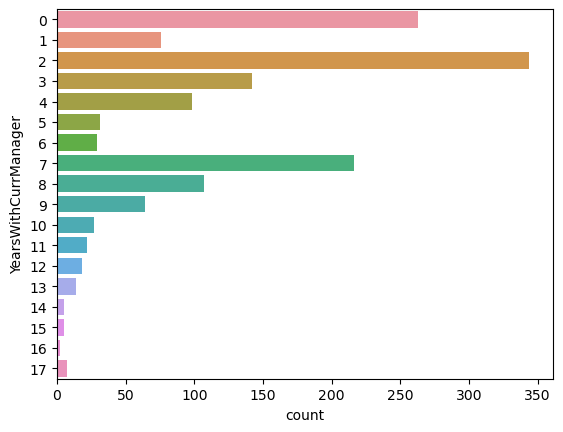

In [15]:
a=['Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'NumCompaniesWorked' , 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
for i in a:
    sns.countplot(y=df[f"{i}"])
    plt.show()

## 4. Variable transformations

### Encoding of categorical data

In [16]:
# Changing categorical data to numerical
ohe=OneHotEncoder()
x=df[["BusinessTravel",  "Department",  "Gender",  "MaritalStatus",   "OverTime"]].values
x=ohe.fit_transform(x).toarray()
y=z=np.hstack(ohe.categories_)
merge= pd.DataFrame(data=x,columns=y)
dfn=pd.concat([df,merge],axis=1)
pd.set_option('display.max_columns',None)
dfn

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Female,Male,Divorced,Married,Single,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [17]:
dfn.drop(["BusinessTravel","Non-Travel",  "Department","Human Resources",  "Gender", "Female", "MaritalStatus","Divorced",   "OverTime","No"],axis=1,inplace=True)
dfn.rename(columns = {'Yes':'Overtime'},inplace=True)

In [18]:
le=LabelEncoder()
dfn["EducationField"]=le.fit_transform(dfn["EducationField"])
dfn["JobRole"]=le.fit_transform(dfn["JobRole"])

In [19]:
dfn

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Male,Married,Single,Overtime
0,41,Yes,1102,1,2,1,2,94,3,2,7,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,No,279,8,1,1,3,61,2,2,6,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,37,Yes,1373,2,2,4,4,92,2,1,2,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3,33,No,1392,3,4,1,4,56,3,1,6,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,No,591,2,1,3,1,40,3,1,2,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,3,3,41,4,2,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1466,39,No,613,6,1,3,4,42,2,3,0,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1467,27,No,155,4,3,1,2,87,4,2,4,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
1468,49,No,1023,2,3,3,4,63,2,2,7,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [20]:
z=np.abs(zscore(dfn.drop(["Attrition"],axis=1)))
dff=dfn[(z<3).all(axis=1)]
dff

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Male,Married,Single,Overtime
0,41,Yes,1102,1,2,1,2,94,3,2,7,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,No,279,8,1,1,3,61,2,2,6,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,37,Yes,1373,2,2,4,4,92,2,1,2,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3,33,No,1392,3,4,1,4,56,3,1,6,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,No,591,2,1,3,1,40,3,1,2,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,3,3,41,4,2,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1466,39,No,613,6,1,3,4,42,2,3,0,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1467,27,No,155,4,3,1,2,87,4,2,4,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
1468,49,No,1023,2,3,3,4,63,2,2,7,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


### Skewness

In [21]:
#Checking skewness
dff.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
Travel_Frequently           1.585303
Travel_Rarely              -0.912096
R

We do not need to remove skewness as the data contains only 0 and 1 as values.


## 5. Outliers handling

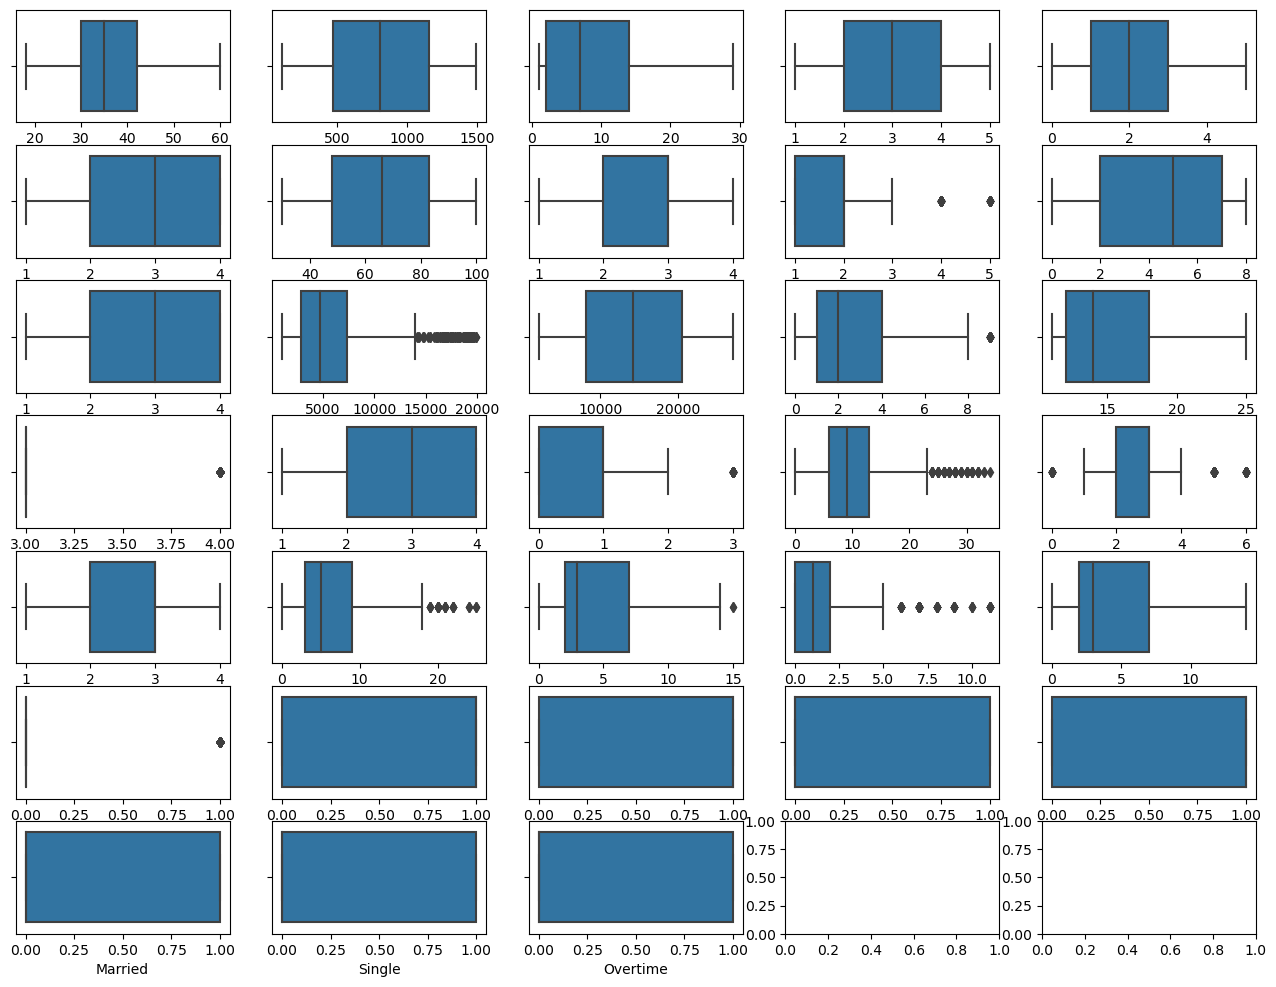

In [22]:
fig,ax = plt.subplots(7,5, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in dff.drop("Attrition",axis=1).columns:
    skew = dff[col].skew()
    sns.boxplot(dff[col], ax = ax[i])  
    i += 1
plt.show()

In [68]:
z=np.abs(zscore(dff.drop("Attrition",axis=1)))
dffn=dff[(z<3).all(axis=1)]
dffn

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Male,Married,Single,Overtime
0,41,Yes,1102,1,2,1,2,94,3,2,7,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,No,279,8,1,1,3,61,2,2,6,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,37,Yes,1373,2,2,4,4,92,2,1,2,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3,33,No,1392,3,4,1,4,56,3,1,6,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,No,591,2,1,3,1,40,3,1,2,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,3,3,41,4,2,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1466,39,No,613,6,1,3,4,42,2,3,0,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1467,27,No,155,4,3,1,2,87,4,2,4,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
1468,49,No,1023,2,3,3,4,63,2,2,7,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [69]:
dff

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Research & Development,Sales,Male,Married,Single,Overtime
0,41,Yes,1102,1,2,1,2,94,3,2,7,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,No,279,8,1,1,3,61,2,2,6,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,37,Yes,1373,2,2,4,4,92,2,1,2,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3,33,No,1392,3,4,1,4,56,3,1,6,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,No,591,2,1,3,1,40,3,1,2,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,3,3,41,4,2,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1466,39,No,613,6,1,3,4,42,2,3,0,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1467,27,No,155,4,3,1,2,87,4,2,4,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
1468,49,No,1023,2,3,3,4,63,2,2,7,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


1387-1304=83, so outlier treatment has removed only 6% of the dataset.

## 6. Scaling of Independent features

In [70]:
X=dffn.drop("Attrition", axis=1)
y=(dffn["Attrition"])
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

#### To find best random state

In [71]:
lg=LogisticRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lg.fit(x_train,y_train)
    lg_predict_train=lg.predict(x_train)
    lg_predict_test=lg.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{accuracy_score(y_train,lg_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{accuracy_score(y_test,lg_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.8957617411225659
At random state 0, The test accuracy is :-0.8654292343387471


At random state 1, The training accuracy is :-0.8865979381443299
At random state 1, The test accuracy is :-0.8677494199535963


At random state 2, The training accuracy is :-0.8854524627720504
At random state 2, The test accuracy is :-0.8816705336426914


At random state 3, The training accuracy is :-0.8923253150057274
At random state 3, The test accuracy is :-0.8723897911832946


At random state 4, The training accuracy is :-0.8785796105383734
At random state 4, The test accuracy is :-0.8932714617169374


At random state 5, The training accuracy is :-0.8865979381443299
At random state 5, The test accuracy is :-0.8863109048723898


At random state 6, The training accuracy is :-0.9003436426116839
At random state 6, The test accuracy is :-0.8607888631090487


At random state 7, The training accuracy is :-0.8934707903780069
At random state 7, The test accuracy is

#### 63 is the best random state

## 7. Preparing data for modelling

In [72]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=63)

In [73]:
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(978, 33) (978,)
(326, 33) (326,)


## 8. Training and testing of data

In [74]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()

accuracy score for  LogisticRegression() is :  0.8773006134969326 
 [[259   5]
 [ 35  27]] 
               precision    recall  f1-score   support

          No       0.88      0.98      0.93       264
         Yes       0.84      0.44      0.57        62

    accuracy                           0.88       326
   macro avg       0.86      0.71      0.75       326
weighted avg       0.87      0.88      0.86       326
 

Cross Validation Score is : [0.87244898 0.8877551  0.85714286 0.86153846 0.85641026]
Mean Score : 0.8670591313448457


accuracy score for  GaussianNB() is :  0.8067484662576687 
 [[229  35]
 [ 28  34]] 
               precision    recall  f1-score   support

          No       0.89      0.87      0.88       264
         Yes       0.49      0.55      0.52        62

    accuracy                           0.81       326
   macro avg       0.69      0.71      0.70       326
weighted avg       0.82      0.81      0.81       326
 

Cross Validation Score is : [0.80612245 0.785

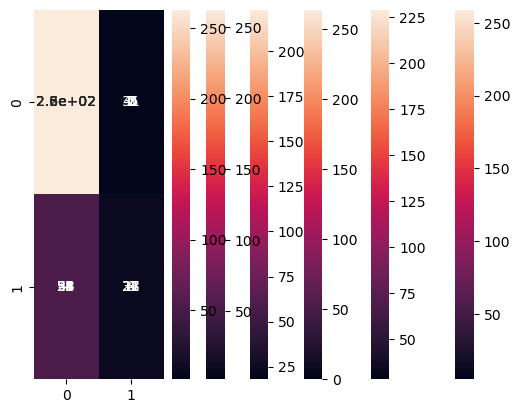

In [75]:
model=[lg,gnb,svc,dtc,knn,rfc]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("accuracy score for ",m,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
    sns.heatmap(confusion_matrix(test_y,predm),annot=True)
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("==============================================\n\n\n====================================================")

accuracy score for  LogisticRegression() is :  0.8773006134969326 which is best

## 9. Hyperparameter tuning for Logistic Regression

In [76]:
dict2={"penalty":['elasticnet','l1','l2'],"solver":['saga'],"max_iter":list(range(100)), "multi_class":['auto', 'ovr', 'multinomial'],"class_weight":['dict','balanced']}
gv=GridSearchCV(lg,dict2, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'class_weight': 'dict',
 'max_iter': 8,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'saga'}

In [78]:
lg_final=LogisticRegression(class_weight= 'dict',max_iter = 8, multi_class= 'auto', penalty='l1',solver= 'saga')
lg_final.fit(train_x,train_y)
prf=lg_final.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(lg_final,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.8742331288343558
Cross Validation Score is : [0.8877551  0.89795918 0.8622449  0.85641026 0.85641026]
Mean Score : 0.8721559392987965


In [80]:
import joblib
joblib.dump(lg_final,"HR_attrition_rfc.obj")

['HR_attrition_rfc.obj']

In [81]:
lg_l=joblib.load('HR_attrition_rfc.obj')

In [82]:
result=lg_l.predict(test_x)

In [83]:
print(accuracy_score(test_y,result))

0.8742331288343558
